# [Hypothesis] Female employment in industrial sector results in crimes


Following crimes are identified to be related to this,

 1. Abduction/ Kidnapping (0.8)
 2. H.B. & Theft (0.77)
 3. Hurt by knife (0.83).

**Imports and workspace setting**

In [1]:
import csv
import math
import os

import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stat

import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
integrated_data = pd.read_csv('../data/integrated_data.csv')
print("Data set size : ", integrated_data.shape)
integrated_data = integrated_data.drop(integrated_data.columns[[0, 2, 3, 4, 5, 6, 22, 23, 25, 26, 27, 28, 29, 30, 31,32, 33, 34]], axis=1)
integrated_data.head()

Data set size :  (25, 37)


,District,Female emp. Agriculture,Female emp. Industry,Female emp. Services,Female emp. Total,Total emp. Agriculture,Total emp. Industry,Total emp. Services,Total employment,Abduction / Kidnapping,Arson,Mischief over Rs.5000/=,H.B. & Theft,Grevious Hurt,Hurt by Knife etc.,Homicide/Abet. To commit suicide,Riot,Possess Automatic/ Repeater Shot Guns,"Offence under Poisons, Opium & Dangerous Drugs"
0,Ampara,1.8,4.1,44.7,50.6,11.3,15.9,30.6,57.8,29,31,36,239,69,38,16,1,0,1
1,Anuradhapura,1.7,5.5,18.0,25.2,2.9,5.8,23.5,32.2,68,47,107,834,108,72,24,4,1,7
2,Badulla,23.7,4.8,17.3,45.8,19.6,7.9,19.9,47.4,38,14,42,359,112,85,28,3,0,20
3,Batticaloa,2.1,4.0,33.2,39.3,16.6,14.8,27.6,59.0,21,33,38,227,56,89,11,0,1,3
4,Colombo,1.3,20.0,50.5,71.7,1.2,20.4,45.4,67.0,154,22,140,2996,248,379,62,3,6,573


**Visualizing relation between female employment and crimes mentioned**

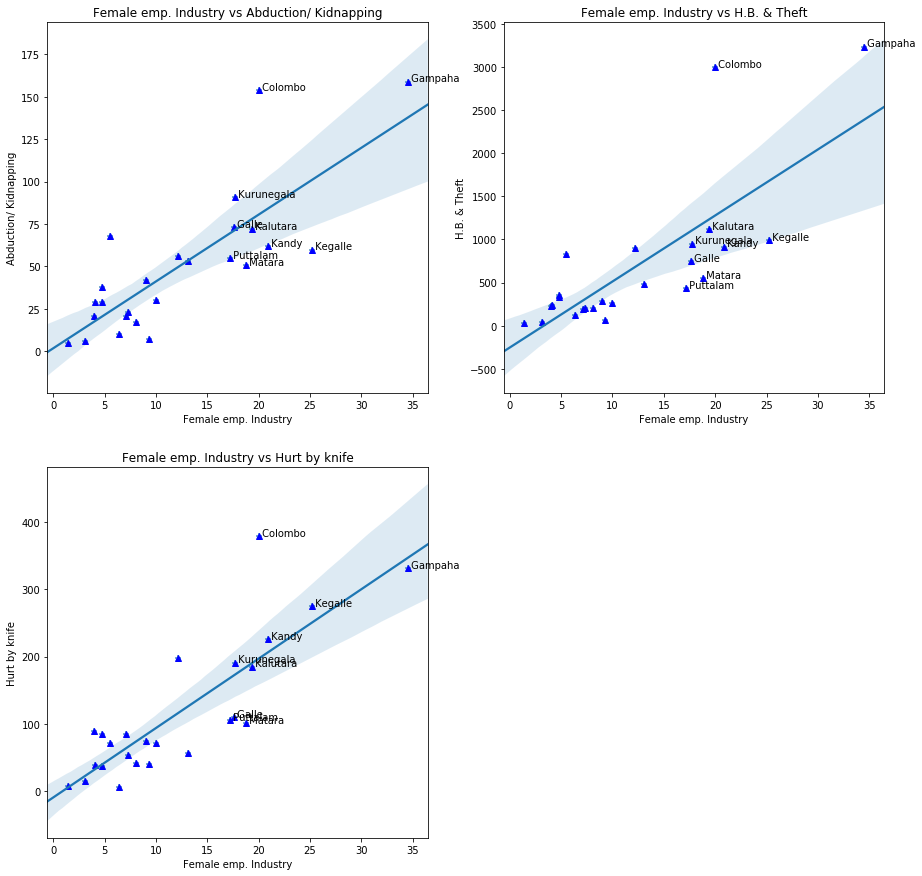

In [6]:
def plotScatterForCrime (column, tag, subPlotIndex):
    plt.subplot(2,2,subPlotIndex)
    plt.plot(integrated_data['Female emp. Industry'],  integrated_data[column], 'b^')

    for i, txt in enumerate(integrated_data['District']):
        if integrated_data['Female emp. Industry'][i] >= 15:
            plt.annotate(' ' + txt, (integrated_data['Female emp. Industry'][i], integrated_data[column][i]))
    
    x, y = pd.Series(integrated_data['Female emp. Industry'], name="x_var"), pd.Series(integrated_data[column], name="y_var")
    ax = sns.regplot(x=x, y=y, marker="+")
    
    plt.title('Female emp. Industry vs ' + tag)
    plt.xlabel("Female emp. Industry")
    plt.ylabel(tag)

plt.figure(figsize=(15, 15))
plt.subplots_adjust(hspace=0.2)

plotScatterForCrime('Abduction / Kidnapping', "Abduction/ Kidnapping", 1)
plotScatterForCrime('H.B. & Theft', "H.B. & Theft", 2)
plotScatterForCrime('Hurt  by Knife etc.', "Hurt by knife", 3)

**Histograms of crime variables**

Text(0.5, 0, 'Hurt  by Knife etc.')

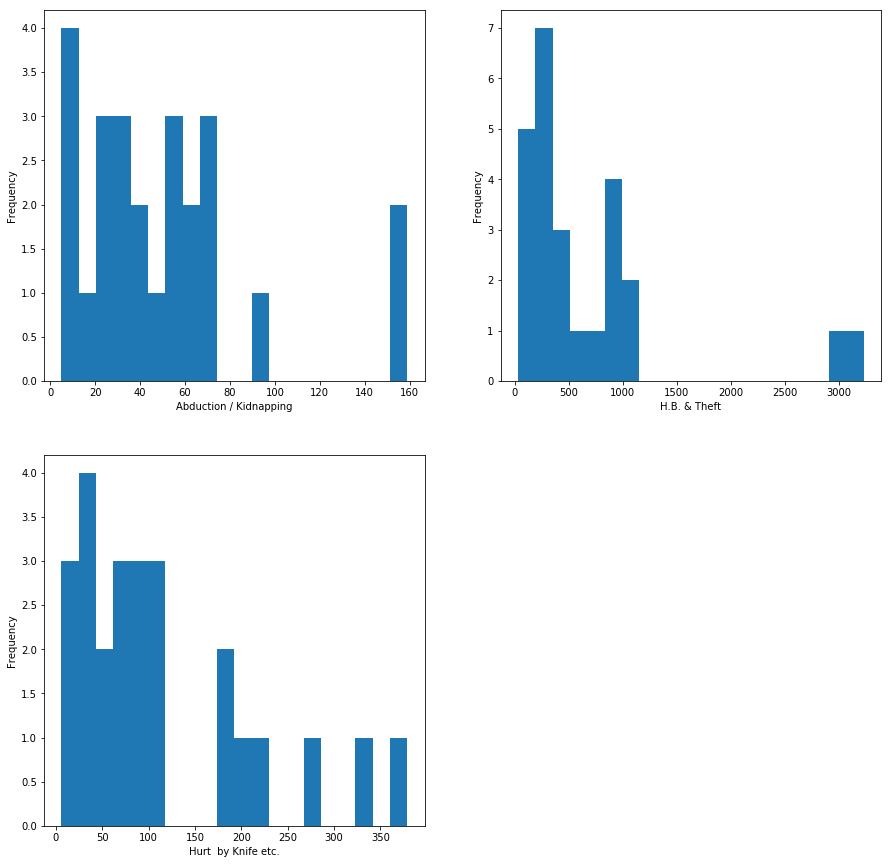

In [14]:
plt.figure(figsize=(15, 15))
plt.subplots_adjust(hspace=0.2)

plt.subplot(2,2,1)
integrated_data['Abduction / Kidnapping'].plot(kind='hist', bins=20)
plt.xlabel('Abduction / Kidnapping')

plt.subplot(2,2,2)
integrated_data['H.B. & Theft'].plot(kind='hist', bins=20)
plt.xlabel('H.B. & Theft')

plt.subplot(2,2,3)
integrated_data['Hurt  by Knife etc.'].plot(kind='hist', bins=20)
plt.xlabel('Hurt  by Knife etc.')

**BoxPlot for data Abduction / Kidnapping**

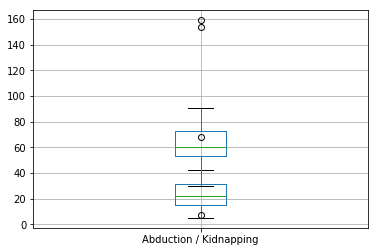

In [31]:
# low_sample = integrated_data[integrated_data.Abduction / Kidnapping <= highLowEarningValMargin].hours
integrated_data.sort_values(by='Female emp. Industry', inplace=True)

integrated_data[:12].boxplot(column=['Abduction / Kidnapping'])
integrated_data[12:].boxplot(column=['Abduction / Kidnapping'])

**Stats about low and high samples**

In [50]:
## Low Female emp. Industry sample
low_sample = integrated_data[:12]
low_sample.describe()

,Female emp. Agriculture,Female emp. Industry,Female emp. Services,Female emp. Total,Total emp. Agriculture,Total emp. Industry,Total emp. Services,Total employment,Abduction / Kidnapping,Arson,Mischief over Rs.5000/=,H.B. & Theft,Grevious Hurt,Hurt by Knife etc.,Homicide/Abet. To commit suicide,Riot,Possess Automatic/ Repeater Shot Guns,"Offence under Poisons, Opium & Dangerous Drugs"
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.00000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,10.391667,5.466667,31.675000,47.508333,13.108333,10.975000,25.575000,49.641667,25.750000,18.083333,33.25000,256.083333,53.916667,50.166667,15.166667,0.750000,0.500000,7.583333
std,15.013537,2.202616,15.906438,16.060933,10.873024,4.373708,6.111409,11.944375,17.628103,13.097247,26.78916,208.185432,35.991055,30.685600,8.233339,1.356801,0.904534,12.652404
min,0.000000,1.400000,10.700000,25.200000,2.600000,5.200000,15.900000,31.700000,5.000000,4.000000,3.00000,30.000000,11.000000,6.000000,3.000000,0.000000,0.000000,0.000000
25%,1.875000,4.075000,17.925000,36.950000,8.050000,8.200000,22.000000,42.850000,15.250000,8.500000,16.75000,172.500000,24.000000,31.500000,9.750000,0.000000,0.000000,1.000000
50%,3.300000,5.150000,32.800000,47.550000,10.300000,9.650000,25.750000,51.150000,22.000000,15.000000,31.50000,218.500000,49.000000,47.500000,14.500000,0.000000,0.000000,3.000000
75%,12.100000,7.150000,41.525000,59.100000,15.025000,15.075000,30.725000,58.100000,31.250000,25.000000,39.00000,295.750000,75.750000,76.500000,23.250000,1.000000,1.000000,5.500000
max,52.400000,9.000000,66.500000,72.900000,43.700000,18.500000,34.100000,68.500000,68.000000,47.000000,107.00000,834.000000,112.000000,89.000000,28.000000,4.000000,3.000000,44.000000


In [51]:
## High Female emp. Industry sample
high_sample = integrated_data[12:]
high_sample.describe()

,Female emp. Agriculture,Female emp. Industry,Female emp. Services,Female emp. Total,Total emp. Agriculture,Total emp. Industry,Total emp. Services,Total employment,Abduction / Kidnapping,Arson,Mischief over Rs.5000/=,H.B. & Theft,Grevious Hurt,Hurt by Knife etc.,Homicide/Abet. To commit suicide,Riot,Possess Automatic/ Repeater Shot Guns,"Offence under Poisons, Opium & Dangerous Drugs"
count,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000
mean,9.600000,18.146154,29.415385,57.161538,8.876923,19.746154,27.530769,56.161538,71.000000,28.307692,53.538462,1052.769231,83.000000,174.461538,35.615385,0.461538,1.769231,72.076923
std,6.437261,6.689870,9.745242,11.821628,4.585331,4.656289,7.808477,9.227453,43.032933,14.320059,35.813441,966.713604,63.818754,106.941273,21.191738,0.877058,1.877669,153.271253
min,1.000000,9.300000,17.000000,34.600000,1.200000,12.800000,16.300000,41.300000,7.000000,3.000000,6.000000,71.000000,16.000000,40.000000,4.000000,0.000000,0.000000,0.000000
25%,6.100000,13.100000,22.400000,51.100000,6.800000,18.000000,24.000000,50.100000,53.000000,21.000000,29.000000,487.000000,40.000000,101.000000,21.000000,0.000000,1.000000,10.000000
50%,7.200000,17.700000,27.100000,59.100000,7.900000,19.900000,24.600000,59.000000,60.000000,27.000000,50.000000,900.000000,66.000000,185.000000,29.000000,0.000000,1.000000,20.000000
75%,14.800000,20.000000,35.200000,65.600000,12.900000,20.400000,34.300000,65.000000,73.000000,38.000000,68.000000,997.000000,101.000000,226.000000,50.000000,1.000000,2.000000,65.000000
max,22.500000,34.500000,50.500000,71.700000,16.500000,32.400000,45.400000,69.400000,159.000000,53.000000,140.000000,3235.000000,248.000000,379.000000,76.000000,3.000000,6.000000,573.000000


**Distribution plots for 3 crimes**

In [58]:
def plotDistributionPlot(column):
    fig, ax = plt.subplots(figsize=(8,4))
    
    low_sample.sort_values(by=column, inplace=True)
    high_sample.sort_values(by=column, inplace=True)

    low_sample_fit = stat.norm.pdf(low_sample[column], low_sample[column].mean(), low_sample[column].std())
    ax.plot(low_sample[column], low_sample_fit, label='Low Female emp. Industry sample')

    high_sample_fit = stat.norm.pdf(high_sample[column], high_sample[column].mean(), high_sample[column].std())
    ax.plot(high_sample[column], high_sample_fit, label='High Female emp. Industry sample')

    plt.title('Distribution of '+ column)
    plt.xlabel(column)
    plt.ylabel('pdf')
    plt.legend()

C:\Users\Prageeth\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\Prageeth\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


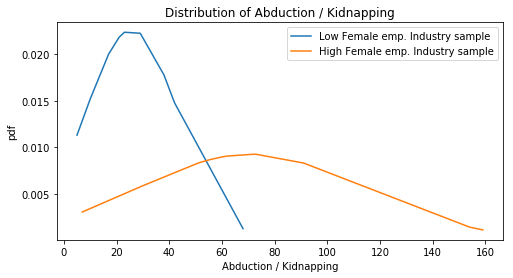

In [59]:
plotDistributionPlot('Abduction / Kidnapping')

C:\Users\Prageeth\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\Prageeth\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


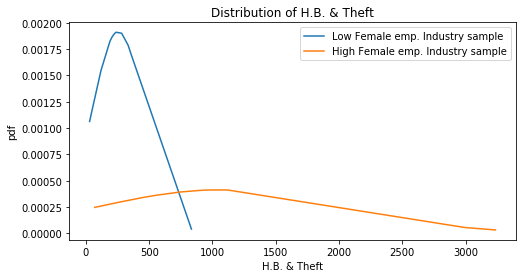

In [60]:
plotDistributionPlot('H.B. & Theft')

C:\Users\Prageeth\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\Prageeth\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


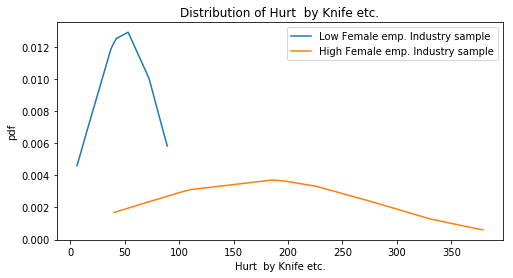

In [61]:
plotDistributionPlot('Hurt  by Knife etc.')

**Hypothesis testing**

In [70]:
statistics, p = stat.ttest_ind(high_sample['Abduction / Kidnapping'], low_sample['Abduction / Kidnapping'])
print('Statistics=%.3f, p=%.3f' % (statistics, p))
# interpret
alpha = 0.05  # 5% area under the normal graph
if p > alpha:
	print('More Females working in Industry sector has no relation to high Abduction / Kidnapping (fail to reject H0)')
else:
	print('More Females working in Industry sector has relation to high Abduction / Kidnapping(reject H0)')

Statistics=3.385, p=0.003
More Females working in Industry sector has relation to high Abduction / Kidnapping(reject H0)


In [71]:
statistics, p = stat.ttest_ind(high_sample['Hurt  by Knife etc.'], low_sample['Hurt  by Knife etc.'])
print('Statistics=%.3f, p=%.3f' % (statistics, p))
# interpret
alpha = 0.05  # 5% area under the normal graph
if p > alpha:
	print('More Females working in Industry sector has no relation to high Hurt by Knife etc. (fail to reject H0)')
else:
	print('More Females working in Industry sector has relation to high Hurt by Knife etc. (reject H0)')

Statistics=3.876, p=0.001
More Females working in Industry sector has relation to high Hurt by Knife etc. (reject H0)


In [72]:
statistics, p = stat.ttest_ind(high_sample['H.B. & Theft'], low_sample['H.B. & Theft'])
print('Statistics=%.3f, p=%.3f' % (statistics, p))
# interpret
alpha = 0.05  # 5% area under the normal graph
if p > alpha:
	print('More Females working in Industry sector has no relation to high H.B. & Theft (fail to reject H0)')
else:
	print('More Females working in Industry sector has relation to high H.B. & Theft (reject H0)')

Statistics=2.791, p=0.010
More Females working in Industry sector has relation to high H.B. & Theft (reject H0)
